# <span style="color:Red">Exploratory Data Analysis of Walkability Data Generated by Topsis MCDA</span>

### <span style="color:green">Import Required Libraries</span>

In [1]:
print("Loading Libraries...\n")
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import matplotlib.pyplot as plt
%matplotlib inline
print("Successful!\n")

Loading Libraries...

Successful!



### <span style="color:green">Data Loading</span>

In [2]:
data_name = "C:/Users/Dell/OneDrive/Desktop/urban-green-spaces/Walkability/Data/TOPSIS-score.csv"
data = pd.read_csv(data_name, squeeze=True)
data.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15332\734506012.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv(data_name, squeeze=True)


,geometry,elevation,green-index,population-density,building-density,street-intersection-density,temperature,Topsis Score,Rank
0,"POLYGON ((253012.92065789475 9868497.4528, 253...",1635,0.247765,9.233768,0,0,18.000000,0.009684,172
1,"POLYGON ((253929.66654736843 9868497.4528, 253...",1635,0.247765,3.235362,0,0,18.000000,0.003336,178
2,"POLYGON ((261263.6336631579 9868497.4528, 2612...",1635,0.247765,4.208464,0,0,18.000000,0.004366,176
3,POLYGON ((253012.92065789475 9867559.088446153...,1635,0.247765,9.663217,0,0,18.000000,0.010139,171
4,POLYGON ((253929.66654736843 9867559.088446153...,1771,0.565931,0.887574,0,0,18.958387,0.007106,174


In [3]:
# data = data.copy()
# data = data.drop(["Unnamed: 0", "Rank"], axis=1)

In [4]:
data.head()

,geometry,elevation,green-index,population-density,building-density,street-intersection-density,temperature,Topsis Score,Rank
0,"POLYGON ((253012.92065789475 9868497.4528, 253...",1635,0.247765,9.233768,0,0,18.000000,0.009684,172
1,"POLYGON ((253929.66654736843 9868497.4528, 253...",1635,0.247765,3.235362,0,0,18.000000,0.003336,178
2,"POLYGON ((261263.6336631579 9868497.4528, 2612...",1635,0.247765,4.208464,0,0,18.000000,0.004366,176
3,POLYGON ((253012.92065789475 9867559.088446153...,1635,0.247765,9.663217,0,0,18.000000,0.010139,171
4,POLYGON ((253929.66654736843 9867559.088446153...,1771,0.565931,0.887574,0,0,18.958387,0.007106,174


## <span style="color:green">EDA</span>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geometry                     181 non-null    object 
 1   elevation                    181 non-null    int64  
 2   green-index                  181 non-null    float64
 3   population-density           181 non-null    float64
 4   building-density             181 non-null    int64  
 5   street-intersection-density  181 non-null    int64  
 6   temperature                  181 non-null    float64
 7   Topsis Score                 181 non-null    float64
 8   Rank                         181 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 12.9+ KB


In [6]:
print(data.shape)

(181, 9)


In [7]:
data.isnull().sum()

geometry                       0
elevation                      0
green-index                    0
population-density             0
building-density               0
street-intersection-density    0
temperature                    0
Topsis Score                   0
Rank                           0
dtype: int64

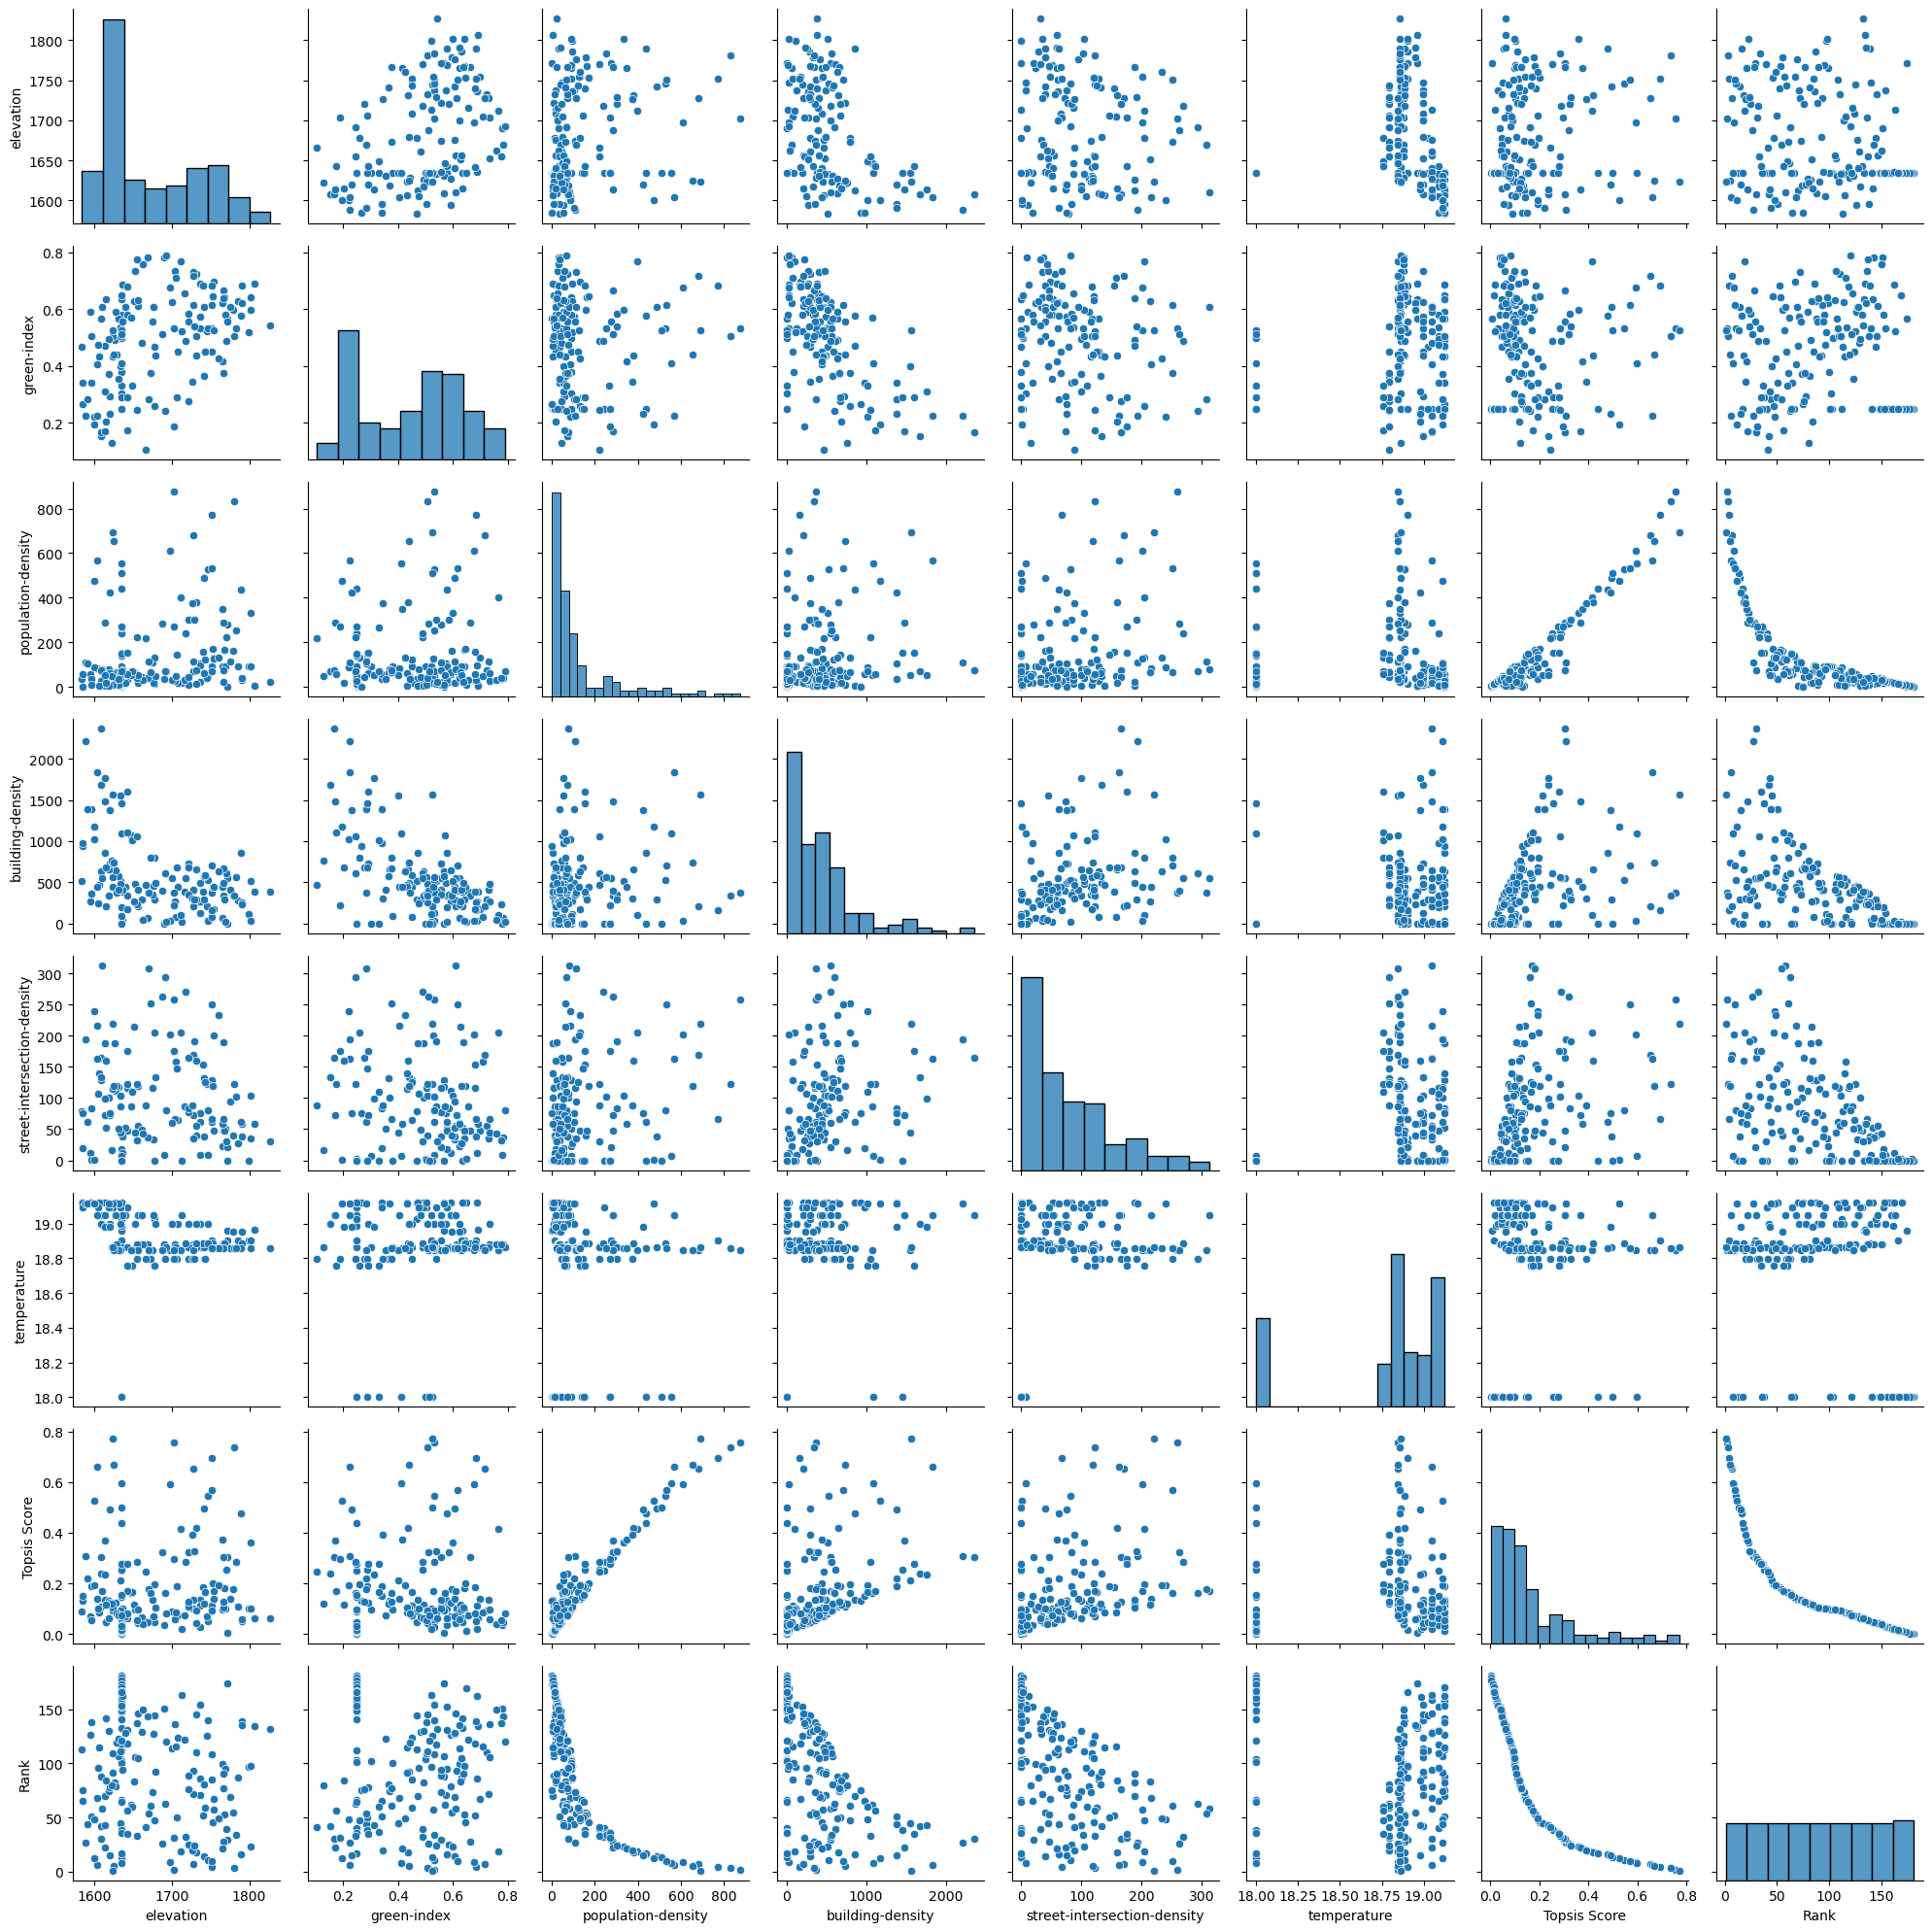

In [8]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

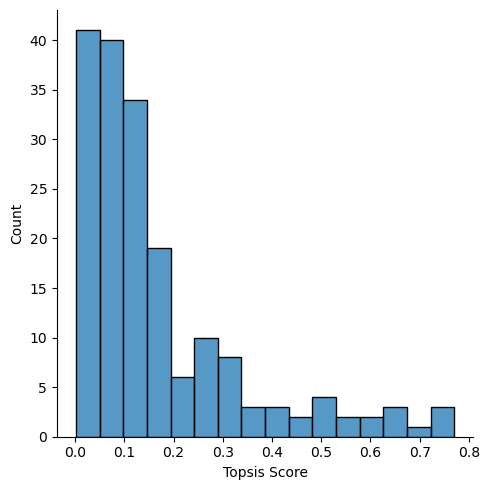

In [9]:
# Distribution plot
sns.displot(data["Topsis Score"])
plt.tight_layout()

In [10]:
print("Skewness: %f" % data['Topsis Score'].skew())
print("Kurtosis: %f" % data['Topsis Score'].kurt())

Skewness: 1.751583
Kurtosis: 2.685514


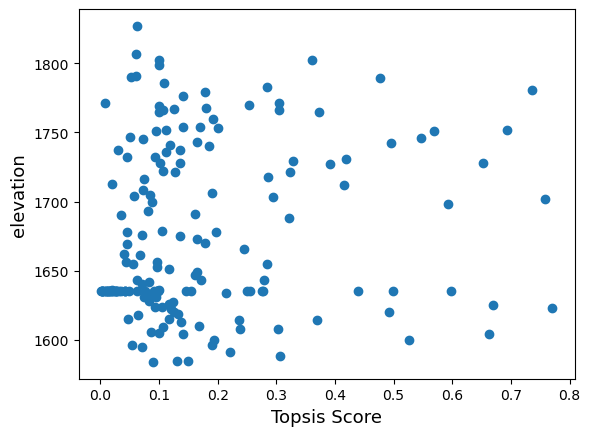

In [11]:
# Compare relationship between TOPSIS scores with the feature variables.
fig, ax = plt.subplots()
ax.scatter(x=data['Topsis Score'], y=data['elevation'])
plt.ylabel("elevation", fontsize=13)
plt.xlabel("Topsis Score", fontsize=13)
plt.show()

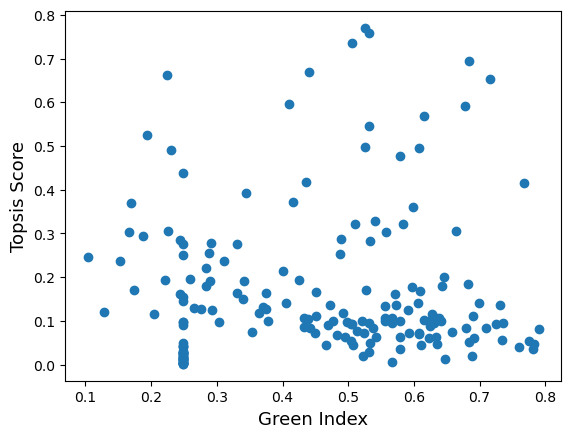

In [12]:
fig, ax = plt.subplots()
ax.scatter(x=data['green-index'], y=data['Topsis Score'])
plt.ylabel("Topsis Score", fontsize=13)
plt.xlabel("Green Index", fontsize=13)
plt.show()

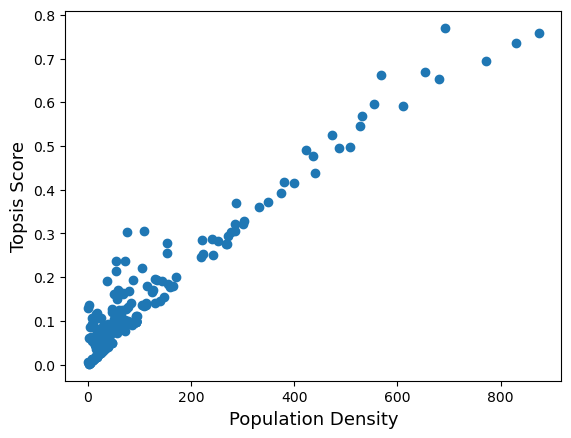

In [13]:
fig, ax = plt.subplots()
ax.scatter(x=data['population-density'], y=data['Topsis Score'])
plt.ylabel("Topsis Score", fontsize=13)
plt.xlabel("Population Density", fontsize=13)
plt.show()

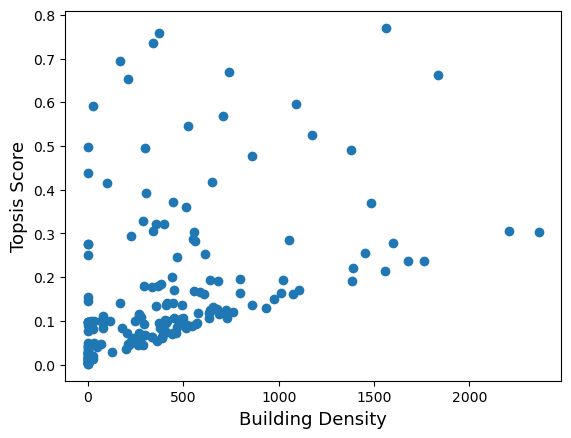

In [14]:
fig, ax = plt.subplots()
ax.scatter(x=data['building-density'], y=data['Topsis Score'])
plt.ylabel("Topsis Score", fontsize=13)
plt.xlabel("Building Density", fontsize=13)
plt.show()

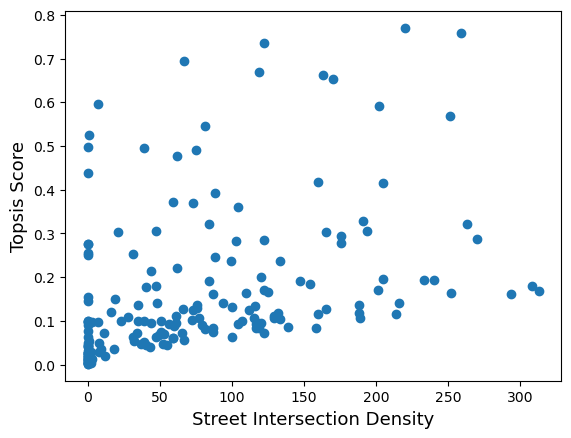

In [15]:
fig, ax = plt.subplots()
ax.scatter(x=data['street-intersection-density'], y=data['Topsis Score'])
plt.ylabel("Topsis Score", fontsize=13)
plt.xlabel("Street Intersection Density", fontsize=13)
plt.show()

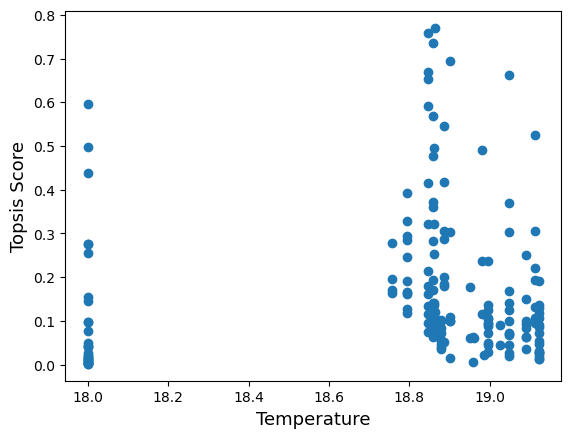

In [15]:
fig, ax = plt.subplots()
ax.scatter(x=data['temperature'], y=data['Topsis Score'])
plt.ylabel("Topsis Score", fontsize=13)
plt.xlabel("Temperature", fontsize=13)
plt.show()

In [16]:
# There is no need of standardizing our data because we are not using distance-based models and we are majorly
# Interested in classification. We can proceed in creating dummy variables on our proxy targets
#Creating a composite proxy target variable based on TOPSIS score
binned = pd.cut(data["Topsis Score"], bins = [.001607, .105600, .770284], labels = [0,1]) #creating a binary dummy
data["walkability_proxy_target"] = binned
data.head(181)

,geometry,elevation,green-index,population-density,building-density,street-intersection-density,temperature,Topsis Score,Rank,walkability_proxy_target
0,"POLYGON ((253012.92065789475 9868497.4528, 253...",1635,0.247765,9.233768,0,0,18.000000,0.009684,172,0
1,"POLYGON ((253929.66654736843 9868497.4528, 253...",1635,0.247765,3.235362,0,0,18.000000,0.003336,178,0
2,"POLYGON ((261263.6336631579 9868497.4528, 2612...",1635,0.247765,4.208464,0,0,18.000000,0.004366,176,0
3,POLYGON ((253012.92065789475 9867559.088446153...,1635,0.247765,9.663217,0,0,18.000000,0.010139,171,0
4,POLYGON ((253929.66654736843 9867559.088446153...,1771,0.565931,0.887574,0,0,18.958387,0.007106,174,0
...,...,...,...,...,...,...,...,...,...,...
176,"POLYGON ((256679.9042157895 9857237.080553846,...",1729,0.540394,302.642361,287,191,18.795343,0.328394,24,1
177,POLYGON ((257596.65010526316 9857237.080553846...,1703,0.187122,271.562059,224,176,18.795343,0.294661,31,1
178,POLYGON ((258513.39599473684 9857237.080553846...,1666,0.103829,219.612010,469,88,18.795343,0.245614,41,1
179,POLYGON ((259430.14188421052 9857237.080553846...,1655,0.244594,221.384581,1056,122,18.795343,0.284318,33,1


In [17]:
data.head(10)

,geometry,elevation,green-index,population-density,building-density,street-intersection-density,temperature,Topsis Score,Rank,walkability_proxy_target
0,"POLYGON ((253012.92065789475 9868497.4528, 253...",1635,0.247765,9.233768,0,0,18.000000,0.009684,172,0
1,"POLYGON ((253929.66654736843 9868497.4528, 253...",1635,0.247765,3.235362,0,0,18.000000,0.003336,178,0
2,"POLYGON ((261263.6336631579 9868497.4528, 2612...",1635,0.247765,4.208464,0,0,18.000000,0.004366,176,0
3,POLYGON ((253012.92065789475 9867559.088446153...,1635,0.247765,9.663217,0,0,18.000000,0.010139,171,0
4,POLYGON ((253929.66654736843 9867559.088446153...,1771,0.565931,0.887574,0,0,18.958387,0.007106,174,0
5,"POLYGON ((254846.4124368421 9867559.088446153,...",1635,0.633854,24.436656,387,0,18.958387,0.062375,133,0
6,POLYGON ((255763.15832631578 9867559.088446153...,1635,0.247765,18.982219,0,0,18.987038,0.021254,161,0
7,POLYGON ((260346.88777368423 9867559.088446153...,1635,0.247765,2.175821,0,0,18.000000,0.002214,180,0
8,"POLYGON ((261263.6336631579 9867559.088446153,...",1635,0.247765,1.603219,0,0,18.000000,0.001607,181,0
9,"POLYGON ((262180.3795526316 9867559.088446153,...",1635,0.247765,26.037719,0,0,18.000000,0.027436,156,0


In [18]:
df_ml_ready = data.copy()

df_ml_ready.sort_values(['Topsis Score'], ascending=False)

,geometry,elevation,green-index,population-density,building-density,street-intersection-density,temperature,Topsis Score,Rank,walkability_proxy_target
166,POLYGON ((257596.65010526316 9858175.444907691...,1623,0.525115,691.482759,1563,220,18.863155,0.770284,1,1
125,"POLYGON ((263097.1254421053 9860990.53796923, ...",1702,0.531172,874.203461,371,259,18.846735,0.757984,2,1
138,POLYGON ((259430.14188421052 9860052.173615385...,1781,0.505809,830.622488,343,122,18.859493,0.736518,3,1
88,"POLYGON ((262180.3795526316 9862867.266676923,...",1752,0.684491,771.844043,168,67,18.901808,0.694021,4,1
165,"POLYGON ((256679.9042157895 9858175.444907691,...",1625,0.439746,654.157390,737,119,18.846735,0.669880,5,1
...,...,...,...,...,...,...,...,...,...,...
27,POLYGON ((253012.92065789475 9865682.359738462...,1635,0.247765,3.235368,0,0,18.000000,0.003336,177,0
1,"POLYGON ((253929.66654736843 9868497.4528, 253...",1635,0.247765,3.235362,0,0,18.000000,0.003336,178,0
11,POLYGON ((253929.66654736843 9866620.724092308...,1635,0.247765,2.963344,0,2,18.000000,0.003165,179,0
7,POLYGON ((260346.88777368423 9867559.088446153...,1635,0.247765,2.175821,0,0,18.000000,0.002214,180,0


In [19]:
# save the dataframe as csv file.
filename = "C:/Users/Dell/OneDrive/Desktop/urban-green-spaces/Walkability/Data/Walkability-cleaned.csv"
file = df_ml_ready.to_csv(filename)

In [20]:
df_ml_ready.describe()

,elevation,green-index,population-density,building-density,street-intersection-density,temperature,Topsis Score,Rank
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,1674.569061,0.448467,130.601910,422.220994,76.397790,18.783518,0.167421,91.000000
std,60.664120,0.177323,176.261067,457.791784,77.218354,0.371647,0.170120,52.394338
min,1584.000000,0.103829,0.085889,0.000000,0.000000,18.000000,0.001607,1.000000
25%,1635.000000,0.247765,23.205191,24.000000,2.000000,18.795343,0.057307,46.000000
50%,1642.000000,0.476243,63.431060,343.000000,59.000000,18.878773,0.105600,91.000000
75%,1728.000000,0.596821,139.661804,573.000000,120.000000,19.025234,0.199780,136.000000
max,1827.000000,0.790202,874.203461,2364.000000,313.000000,19.122387,0.770284,181.000000
